# Thoracic Surgery Life Expectancy
---

<p>Lung cancer is the leading cause of cancer death and the second most diagnosed cancer in both men and women in the United States. After increasing for decades, lung cancer rates are decreasing nationally, as fewer people smoke cigarettes.</p>

<p>The American Cancer Society's projected that for 2019 lung cancer in the United States, there are:
<ul>
<li>Around 1,762,450 new cancer cases
<li>Around 606,880 cancer deaths to occur
</ul>
</p>

<p>Over the past decade of data, the cancer incidence rate (2006‐2015) was stable in women and declined by approximately 2% per year in men, whereas the cancer death rate (2007‐2016) declined annually by 1.4% and 1.8%, respectively.</p>

### Abstract
---

<p>The data is dedicated to classification problem related to the post-operative life expectancy in the lung cancer patients: class 1 - death within one year after surgery, class 2 - survival.</p>

### Data Set Information
---

<p>The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007-2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.</p>

<p>The sample data set includes 470 rows of patient’s data with 16 attributes/features as the columns. The death_1yr attribute column can determine if a given patient lived or died.  A "false" value indicates that the patient lived 1 year post surgery, while a "true" value indicates the patient died within 1 year of the surgery.</p>



### Attribute Information
---

|   Attribute  |   Name|  Description  |
|:--------------|:--------------|:--------------|
| DGN |   **Diagnosis**  | Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any |
| PRE4 |   **FVC**  | Forced vital capacity - FVC (numeric) - Amount of air which can be forcibly exhaled from the lungs after taking the deepest breath possible |
| PRE5 |   **FEV1**  | Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric) |
| PRE6 |   **Zubrod_Scale**  | Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0) - Good or normal activity (0) to Poor or requires assistance (2) |
| PRE7 |   **Pain**  | Pain before surgery (T = 1, F = 0)  |
| PRE8 |   **Haemoptysis**  | Haemoptysis or Coughing up blood, before surgery (T = 1, F = 0) |
| PRE9 |   **Dyspnoea**  | Dyspnoea or Difficulty or labored breathing, before surgery (T = 1, F = 0)  |
| PRE10	|   **Cough**  | Symptoms of Coughing, before surgery (T = 1, F = 0)   |
| PRE11	|   **Weakness**  | Weakness, before surgery (T = 1, F = 0)  |
| PRE14	|   **Tumor_Size**  |  T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13) -  1 (smallest) to 4 (largest) |
| PRE17	|   **Diabetes**  | Type 2 Diabetes Mellitus (T = 1, F = 0)   |
| PRE19	|   **MI_6mo**  | Myocardial infarction (Heart Attack), up to 6 months prior(T = 1, F = 0)   |
| PRE25	|   **PAD**  | Peripheral Arterial Diseases (T = 1, F = 0)   |
| PRE30	|   **Smoker**  | Patient Smoked (T = 1, F = 0)   |
| PRE32 |   **Asthmatic**  | Patient has Asthma (T = 1, F = 0)   |
| AGE |   **Age**  | Age at Surgery   |
| Risk1Y |   **Death_1yr**  | 1 year survival period - (T) value if died (T = 1, F = 0)    |

In [7]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The code for this notebook is hidden for easier reading.
To toggle it on/off, please click <a href="javascript:code_toggle()">here</a>.''')


In [27]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#### Data File Conversion and Processing ####

The [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data) data set had the data file in ARFF format "ThoraricSurgery.ARFF". This file was converted into CSV format "ThoraricSurgery_Converted.csv" for easier loading into Pandas Dataframe.

In [28]:
df = pd.read_csv('ThoraricSurgery_Converted.csv')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
id         470 non-null int64
DGN        470 non-null object
PRE4       470 non-null float64
PRE5       470 non-null float64
PRE6       470 non-null object
PRE7       470 non-null object
PRE8       470 non-null object
PRE9       470 non-null object
PRE10      470 non-null object
PRE11      470 non-null object
PRE14      470 non-null object
PRE17      470 non-null object
PRE19      470 non-null object
PRE25      470 non-null object
PRE30      470 non-null object
PRE32      470 non-null object
AGE        470 non-null int64
Risk1Yr    470 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


(470, 18)

**Data Set Information:** There are 470 rows of patient data and 18 columns describing the attributes of the patient.

In [29]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


**Data Manipulation:** 
- Let us convert the True/False values to 1 or 0.
- Rename the columns to more meaningful names.

In [30]:
# Convert T or F string values into int values of 1 or 0
df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] = \
(df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] == 'T').astype(int)

# Change columns with string values to just the int values of those columns by taking the last chracters in the string
df['DGN'] = df.DGN.str[-1:].astype(int)
df['PRE6'] = df.PRE6.str[-1:].astype(int)
df['PRE14'] = df.PRE14.str[-1:].astype(int)

# Drop id column. Using index for id.
df = df.drop(['id'], axis=1)

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [31]:
# Rename column names
# Backslash breaks the line of code allowing for the next line continuation.
col_names = {'DGN': 'Diagnosis', 'PRE4': 'Forced_Capacity', 'PRE5': 'Forced_Expiration', 'PRE6': 'Zubrod_Scale', \
            'PRE7': 'Pain', 'PRE8': 'Haemoptysis', 'PRE9': 'Dyspnoea', 'PRE10': 'Cough', \
            'PRE11': 'Weakness', 'PRE14': 'Tumor_Size', 'PRE17': 'Diabetes', \
            'PRE19': 'MI_6mo', 'PRE25': 'PAD', 'PRE30': 'Smoker', 'PRE32': 'Asthmatic', \
            'AGE': 'Age', 'Risk1Yr': 'Death_1yr'}
df = df.rename(index=str, columns=col_names)
df.head()

,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_Scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoker,Asthmatic,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [32]:
df.describe()

,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_Scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoker,Asthmatic,Age,Death_1yr
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,1.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


### Based on the above data, here are some of the observations: ###

We have 16 features consisting of both categorical as well as the numerical features. Response variable is 'Death_1yr' of the patients which can 1 and 0 (representing 'Death' and 'Live' respectively). 

#### Categorical Features #### 
Pain, Haemoptysis, Dyspnoea, Cough, Weakness, Diabetes, Heart Attack in 6 mos, PAD, Smoking, Asthma, Death in 1 year
#### Numerical Features #### 
Forced Capacity, Forced Expiration, Age

### Let us check for the Outliers for the Numerical Data Features ###

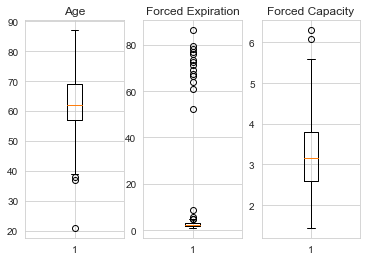

In [17]:
# Check Outliers - Age, Forced Capacity and Forced Expiration in the Data

fig, axs = plt.subplots(1,3)

axs[0].boxplot(df.Age)
axs[0].set_title('Age')

axs[1].boxplot(df.Forced_Expiration)
axs[1].set_title('Forced Expiration')

axs[2].boxplot(df.Forced_Capacity)
axs[2].set_title("Forced Capacity")
plt.show()

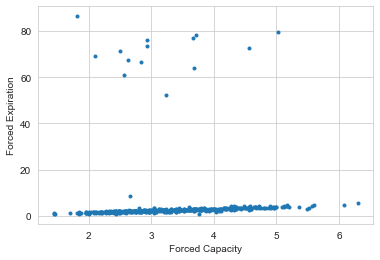

In [33]:
plt.plot(df.Forced_Capacity, df.Forced_Expiration, linestyle='none', marker='.')
plt.xlabel('Forced Capacity')
plt.ylabel('Forced Expiration')
plt.show()

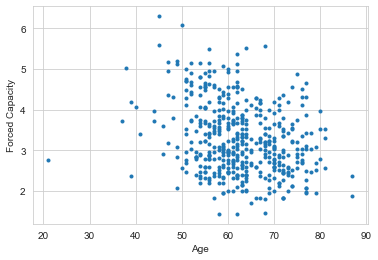

In [34]:
plt.plot(df.Age, df.Forced_Capacity, linestyle='none', marker='.')
plt.xlabel('Age')
plt.ylabel('Forced Capacity')
plt.show()

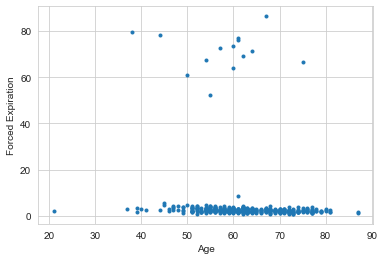

In [35]:
plt.plot(df.Age, df.Forced_Expiration, linestyle='none', marker='.')
plt.xlabel('Age')
plt.ylabel('Forced Expiration')
plt.show()

#### Remove the outliers in Age and Forced Expiration ####

In [36]:
# Outliers for Age and Forced_Expiration columns should be removed. 
# 15 rows from high Forced_Expiration. 1 row from low Age.
df = df[df.Age > 30]
df = df[df.Forced_Expiration < 8]


In [37]:
# Original data set contained 470
len(df)

454

#### Write the clean data into a new CSV file ####

In [38]:
# Write the Changesd to new CSV file.
df.to_csv('ThoracicSurgery_Cleaned.csv')

### Statistical Analysis ###
---

We will create 2 groups of data: 

- Patients that are live after 1 year of Surgery (**live group**)
- Patients who passed away within 1 year of Surgery (**death group**)

In [39]:
# Patient Statistics for 2 groups - live after 1 yr and death after 1 yr of surgery

live = df[df['Death_1yr'] == 0]
death = df[df['Death_1yr'] == 1]

#### Let us check the mean of the patient attributes in these 2 groups ####

In [40]:
attr = ['Forced_Capacity', 'Forced_Expiration', 'Zubrod_Scale', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
        'Tumor_Size', 'Diabetes', 'MI_6mo', 'PAD', 'Smoker', 'Asthmatic', 'Age']

l = [np.mean(live[a]) for a in attr]
d = [np.mean(death[a]) for a in attr]
f = [np.mean(df[a]) for a in attr]

ld = pd.DataFrame(data={'Attribute': attr, 'Live 1 Year Mean': l, 'Death 1 Year Mean': d, 'Total Mean': f})
ld = ld.set_index('Attribute')

print('Death: {:d}, Live: {:d}, Total: {:d}'.format(len(death), len(live), len(df)))
print("1 year death: {:.2f}% out of {:d} patients".format(np.mean(df.Death_1yr)*100, len(df)))
ld

Death: 69, Live: 385, Total: 454
1 year death: 15.20% out of 454 patients


,Live 1 Year Mean,Death 1 Year Mean,Total Mean
Attribute,,,
Forced_Capacity,3.304597,3.195072,3.287952
Forced_Expiration,2.540805,2.383188,2.516850
Zubrod_Scale,0.774026,0.913043,0.795154
Pain,0.051948,0.101449,0.059471
Haemoptysis,0.124675,0.202899,0.136564
Dyspnoea,0.044156,0.115942,0.055066
Cough,0.677922,0.797101,0.696035
Weakness,0.158442,0.246377,0.171806
Tumor_Size,1.683117,2.014493,1.733480


### How many patients died with in 1 year post-surgery?

---

Out of the 454 patients, 69 did not survive 1 year Post-Surgery, which is 15.20 % of the total sample size.

Simply looking at the means of these two different patient groups, we notice that there are features with significant differences and others with minor differences. However, it is difficult to compare these features with each other, therefore doing a normalization of each value will help with easy comparision.

We notice that the 2 sample groups are independent; i.e. the observations in **live group** are not affected by observations in **death group**, and vice versa.

Let us test if the set of differences between sample means for these 2 groups is normally distributed. This will be true if each group is normal or if the sample sizes are large. (Based on the central limit theorem, sample sizes of 40 would probably be large enough).


#### Calculate Mean Differences

In [41]:
# 'Forced_Capacity', 'Forced_Expiration', 'Zubrod_Scale', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',
# 'Tumor_Size', 'Diabetes', 'MI_6mo', 'PAD', 'Smoker', 'Asthmatic', 'Age']
# l = [np.mean(live[a]) for a in attr]
# d = [np.mean(death[a]) for a in attr]

# Percentage mean difference of live vs death patients
d = np.array(d)
l = np.array(l)

p_diff = (d-l)/l*100

print(list(zip(attr, p_diff)))

[('Forced_Capacity', -3.3143201874818806), ('Forced_Expiration', -6.203418874077771), ('Zubrod_Scale', 17.960315144441193), ('Pain', 95.28985507246377), ('Haemoptysis', 62.74154589371982), ('Dyspnoea', 162.57459505541348), ('Cough', 17.58009883946915), ('Weakness', 55.50011879306249), ('Tumor_Size', 19.688226874217225), ('Diabetes', 132.48792270531402), ('MI_6mo', -100.0), ('PAD', 85.99033816425121), ('Smoker', 10.17262069602141), ('Asthmatic', -100.0), ('Age', 1.0456812122719108)]


#### Plot Mean Differences


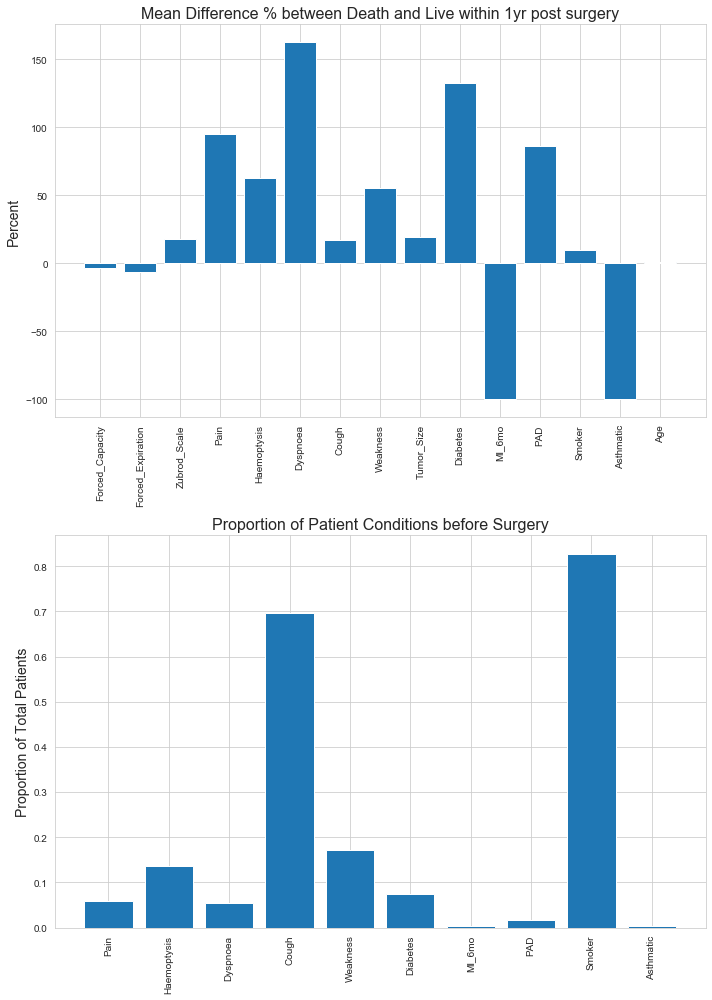

In [53]:
# Plot the mean differences

fig, axes = plt.subplots(2,1,figsize=(10,14))

axes[0].bar(attr, p_diff)
axes[0].set_title('Mean Difference % between Death and Live within 1yr post surgery', fontsize=16)
axes[0].set_xticks(attr)
axes[0].set_xticklabels(attr, rotation=90)
axes[0].set_ylabel('Percent', fontsize=14)

# Count plot of true/false condition columns

tf_col = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Diabetes', 'MI_6mo', 'PAD', 'Smoker', 'Asthmatic']
tf_sum = [df[col].sum()/len(df) for col in tf_col]

axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation=90)
axes[1].set_ylabel('Proportion of Total Patients', fontsize=14)
axes[1].set_title('Proportion of Patient Conditions before Surgery', fontsize=16)

plt.tight_layout()

plt.show()


### What are the differences for the 1 year death patients?
---

Based on the above visualizations, we can easily compare the attributes to determine features of significance.

##### Mean Differences:#####

The most significant attributes for those who died are **- *Dyspnoea*, *Diabetes Mellitus*, *Pain*, *PAD*, and *Haemoptysis* (in decreasing order)**, which indicates that those who died had these features strongly present. Whereas **- *Asthma* and *MI of 6 months** have negative 100% values, indicating that those who died were not asthmatic or MI. 

We consider total count numbers when comparing mean differences, because the lower count number will have larger fluctuations to small differences and hence may give skewed results. 

##### Total Count or Proportion:#####

The total count of *Cough* and *Smoking* are most notable indicating these conditions are strongly correlated, but the mean differences are a small positive values indicating more representation in the dead patients. Looking at the proportion graph for notable features from the mean differences graph, most of the values are low in count. 

To best assess if these attributes' mean differences are of significance, a hypothesis test of whether the mean difference is significant will help narrow down the features of interest.

### Categorical Data (Diagnosis, Tumor Size, Zubrod Scale)
---

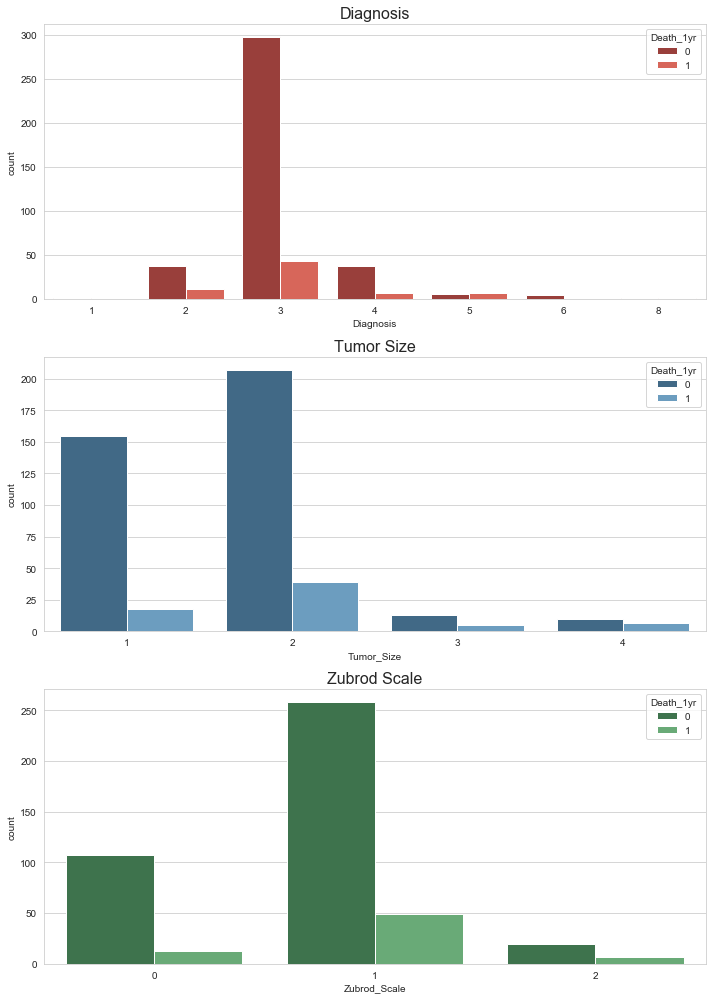

In [56]:
# Count plots of Diagnosis, Tumor_Size, Performance with difference of live and death data

fig, axes = plt.subplots(3,1,figsize=(10,14))

sns.countplot(x='Diagnosis', hue='Death_1yr', data=df, palette='Reds_d', ax=axes[0]).set_title('Diagnosis', fontsize=16)
sns.countplot(x='Tumor_Size', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[1]).set_title('Tumor Size', fontsize=16)
sns.countplot(x='Zubrod_Scale', hue='Death_1yr', data=df, palette='Greens_d', ax=axes[2]).set_title('Zubrod Scale', fontsize=16)

plt.tight_layout()

#### Analysis of live Vs. death patients groups for Diagnosis, Tumor Size, and Zubrod Scale

For **Diagnosis** , the large majority of patients are in category 3. The other categories are relatively small while category 4, 2, and 5 should be considered for their counts in that order. The proportion of live to dead at a glance seems to be similar for the diagnosis categories except for 5, where the death count is higher than the live count, which indicates this diagnosis is more fatal than the others even with surgery.

For **Tumor Size**, categories 1 and 2 are the majority. At a glance, the proportion of the dead to live generally increases with the tumor size ranging from 1 to 4, indicating the higher tumor size correlates to higher chance of death even with surgery. Category 4 tumor size is most even in its split between death and live patient data. Also looking at the dead to live mean difference graph, the dead had higher means indicating larger tumor sizes overall.

For **Zubrod Scale**, categories are 1, 0, 2 in decreasing order of count. Zubrod Scale 0 category reveals low death count and good proportion to live data, which makes sense since on the Zubrod scale 0 is good and 2 is poor for mobility/ambulatory. Category 1 and 2 display similar proportion to live and dead patients, but with category 1 having a majority of the count. Referring to the dead to live mean difference graph, the dead had higher means indicating the dead on average had poorer performance with a higher Zubrod score than the live.

### Using Permutation Test for Hypothesis Tetsing ###

<p>Permutation tests are a group of nonparametric statistics. Here we use a permutation test to test the null hypothesis that two different groups come from the same distribution. The notation and examples shown here are borrowed from Efron and Tibshirani’s An Introduction to the Bootstrap. Our specific problem is that we observe two groups of data</p>

\begin{eqnarray*}
    F \rightarrow \mathbf{z} &= \{ z_{1}, \ldots, z_{n} \}\\
    G \rightarrow \mathbf{y} &= \{ y_{1}, \ldots, y_{m} \}
\end{eqnarray*}

and we are interested in testing the null hypothesis that

H_{0}: F = G.


### Mean Differences between Live and Death Patients

---

All the observations above highlighted the trends and patterns in the attributes. However, to **learn their significance**, a hypothesis test can be conducted to see if these trends are not fortuitous.

> **Null Hypothesis:** The 1 year live and death patients have the similar distribution and mean. (Tested for each attribute.)
  * **Test Statistic:** Mean difference between death and live patients.*Test statistic is a single number that can be computed from the observed data and from the data we have simulated from the null hypothesis”.*
  * **Significance Level:** 0.05, *if we get a p-value >= 0.05, we can say that we are 95% confident that our null hypothesis is true. i.e (100 -(0.05 X 100)).*

### Define Functions to perform Permuation Testing ###

We will use three functions:

- Generate a permuation sample
- Generate multiple permutation replicates
- Mean difference of 2 groups

In [58]:
def permutation_sample(data1, data2):
    #Generate a permutation sample from two data sets.
   # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [59]:
# Hypothesis testing with Permutations of data for each of these attributes
attributes = ['Forced_Capacity', 'Forced_Expiration', 'Zubrod_Scale', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
             'Tumor_Size', 'Diabetes', 'MI_6mo', 'PAD', 'Smoker', 'Asthmatic', 'Age']
p_val = []

for a in attributes:
    empirical_diff_means = diff_of_means(death[a], live[a])
    perm_replicates = draw_perm_reps(death[a], live[a], diff_of_means, size=10000)
    
    # Compute p-value: p
    if empirical_diff_means > 0:
        p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)
    else:
        p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)

print(list(zip(attributes, p_val)))

[('Forced_Capacity', 0.1717), ('Forced_Expiration', 0.0558), ('Zubrod_Scale', 0.0296), ('Pain', 0.102), ('Haemoptysis', 0.0665), ('Dyspnoea', 0.0224), ('Cough', 0.0289), ('Weakness', 0.0587), ('Tumor_Size', 0.0005), ('Diabetes', 0.0208), ('MI_6mo', 0.7111), ('PAD', 0.3528), ('Smoker', 0.0623), ('Asthmatic', 0.7138), ('Age', 0.2775)]


#### Results for Hypothesis Test

>With significance level of **> 0.05**,
 * **Null Hypothesis is True:** Forced_Capacity, Forced_Expiration, Pain, Haemoptysis, Weakness, MI_6mo, PAD, Smoker, Asthmatic, Age
 * **Reject Null Hypothesis:** Zubrod_Scale, Dyspnoea, Cough, Tumor_Size, Diabetes

The null hypothesis stated that the distributions and means of life and death patients were the same for the attributes tested. With the results above, the attributes of significance are those that rejected the null hypothesis. To highlight the trends for those that rejected the null hypothesis, the mean difference percentages are listed below.

**Mean difference % for death in 1 year patients for attributes of significance:**
* Zubrod_Scale = 17.96% 
* Dyspnoea = 162.57% 
* Cough = 17.58%
* Tumor_Size = 19.69%
* Diabetes = 132.49%

### Numerical Data (Age, Forced Capacity, Forced Expiration)
---

The mean difference graph reveals little difference in Age while there is a small negative difference for the dead compared to the live. So this indicates the dead patients on average performed worse for lung capacity compared to the live patients.

The plots below will further investigate the relationship between these three numerical data columns.

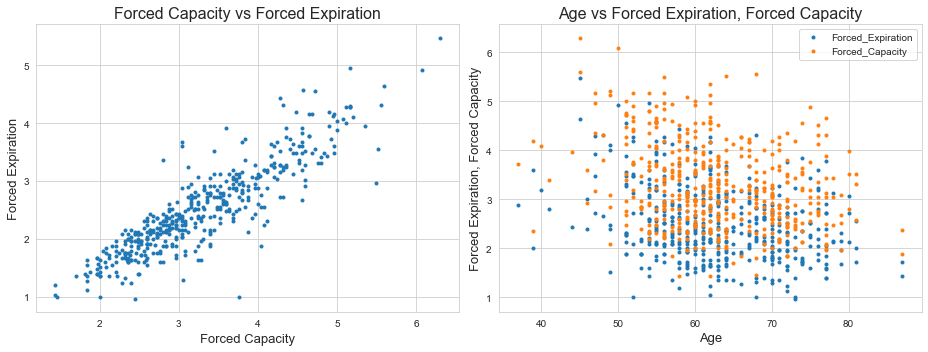

In [60]:
# Scatter plot for Forced Capacity, Forced Expiration, Age columns

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(df.Forced_Capacity, df.Forced_Expiration, linestyle='none', marker='.')

axes[0].set_xlabel('Forced Capacity', fontsize=13)
axes[0].set_ylabel('Forced Expiration', fontsize=13)
axes[0].set_title('Forced Capacity vs Forced Expiration', fontsize=16)

axes[1].plot(df.Age, df.Forced_Expiration, linestyle='none', marker='.', label='Forced_Expiration')
axes[1].plot(df.Age, df.Forced_Capacity, linestyle='none', marker='.', label='Forced_Capacity')
axes[1].set_xlabel('Age', fontsize=13)
axes[1].set_ylabel('Forced Expiration, Forced Capacity', fontsize=13)
axes[1].legend()
axes[1].set_title('Age vs Forced Expiration, Forced Capacity', fontsize=16)

plt.tight_layout()

,Forced_Capacity,Forced_Expiration,Age
Forced_Capacity,1.000000,0.887545,-0.299430
Forced_Expiration,0.887545,1.000000,-0.309617
Age,-0.299430,-0.309617,1.000000


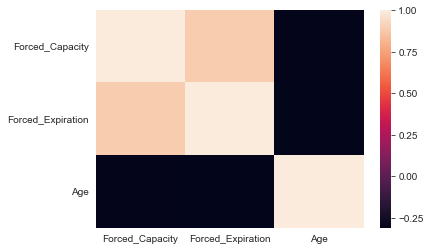

In [61]:
# Drop unnecessary attibutes and rename the dataframe
df2 = df.drop(labels = ['Diagnosis','Zubrod_Scale','Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Tumor_Size', \
                        'Diabetes', 'MI_6mo','PAD','Smoker','Asthmatic','Death_1yr'], axis = 1)


# Correlation Matrix & Heatmap

corr = df2.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

In [62]:
# Correlation coefficients for Forced Capacity and Forced Expiration
np.corrcoef(df.Forced_Capacity, df.Forced_Expiration)[0,1]

0.8875452733829

In [63]:
# Correlation coefficients for Age and Forced Capacity
np.corrcoef(df.Age, df.Forced_Capacity)[0,1]

-0.299429919660491

In [64]:
# Correlation coefficients for Age and Forced Expiration
np.corrcoef(df.Age, df.Forced_Expiration)[0,1]

-0.3096166273079891

#### Correlations of Forced Capacity, Forced Expiration, and Age

From the scatter plot and the correlation graphs, we can see that there is a strong positive correlation between Forced Capacity and Forced Expiration, whereas Age has a slight negative trend in the graphs. 

The correlation coefficient calculated for Forced Capacity and Forced Expiration is *0.89*, which is very strong and the fact that the data points are grouped together to show a visible linear trend. On the other hand, Age's correlation with Forced Capacity and Forced Expiration are about *-0.3* for both, but the data points are more spread out. The mild negative trend for age against the other two features makes intuitive sense as it would be expected that as you get older, your lung capacity decreases.

### Further Exploratory Data Analysis - Empirical Cumulative Distribution Function ###
---

<p>We will perform additional EDA using the Empirical Cumulative Distribution Function (ECDF). The ECDF allows us to plot a feature of your data in order from least to greatest and see the whole feature as if is distributed across the data set.</p>

In [65]:
# Empirical Cumulative Distribution Function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""    
    n = len(data)    
    x = np.sort(data)    
    y = np.arange(1, n+1) / n    
    return x, y

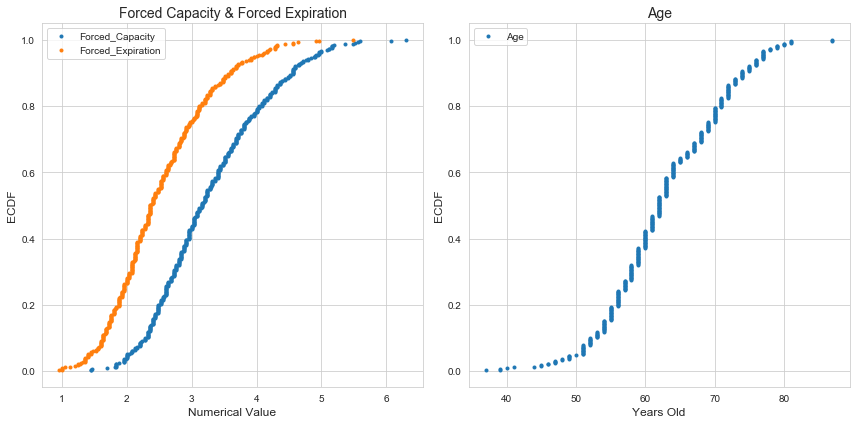

In [72]:
# ECDF of Forced_Capacity, Forced_Expiration, Age
x_fvc, y_fvc = ecdf(df.Forced_Capacity)
x_fev1, y_fev1 = ecdf(df.Forced_Expiration)
x_age, y_age = ecdf(df.Age)

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].plot(x_fvc, y_fvc, marker='.', linestyle='none', label='Forced_Capacity')
axes[0].plot(x_fev1, y_fev1, marker='.', linestyle='none', label='Forced_Expiration')

axes[0].set_xlabel('Numerical Value', fontsize=12)
axes[0].set_ylabel('ECDF', fontsize=12)
axes[0].legend(loc='upper left')
axes[0].set_title('Forced Capacity & Forced Expiration', fontsize=14)

axes[1].plot(x_age, y_age, marker='.', linestyle='none', label='Age')
axes[1].set_xlabel('Years Old', fontsize=12)
axes[1].set_ylabel('ECDF', fontsize=12)
axes[1].legend(loc='upper left')
axes[1].set_title('Age', fontsize=14)

plt.tight_layout()

#### Distribution of Numerical Data

All numerical data display fairly normal distributions. Forced_Capacity and Forced_Expiration are comparable in their distribution with different means; Forced_Expiration with its mean at 2.53 and Forced_Capacity at 3.29. Age mean is at 63.

### Summary ###
---

* Out of the 454 patients, 69 died and 385 lived the 1 year period after surgery. So, 15.20% of patients died.

* Several features were strongly present in patients who died: Dyspnoea, Diabetes Mellitus, Pain, PAD, and Haemoptysis (Top 5 in decreasing order).

* Overall, most patients who received surgery smoked (80%) and presented with symptoms of coughing (70%), while the rest of the attributes presented under 20% of the total patients.

* Majority of patients were categorized as diagnosis code 3. The proportion of live to dead is similar for the diagnosis codes. For tumor size, most of the patients are in category 1 and 2, and the data presents a trend of more proportion of dead as tumor size increases. For Zubrod score, the trend observed is more proportion of dead as Zubrod score increases, which means patient mobility decreases.

* Hypothesis testing reveals attributes of significance: Zubrod Scale, Dyspnoea, Cough, Tumor Size, Diabetes Mellitus.

* As Age increases, the Forced Capacity and Forced Expiration decrease with correlations of -0.30, respectively. Forced Capacity and Forced Expiration are highly correlated with a value of 0.89.

### Experimental Design ###
---

**Hypothesis:** Patients with Diabetes Mellitus and Dyspnoea are more likely to die within 1 year.

**Null Hypothesis:** Patients with Diabetes Mellitus and Dyspnoea have no impact.

**Sample:** 2000 patients will be randomly selected from the total population of patients with lung cancer in the United States. Prior to this experiment, Patient's consent is taken for anonymous data collection and adherence to participation guidelines in exchange for a nominal financial incentive. Patient's attributes (in other words, gender, age, ethnicity, lifestyle, zubrod score, cough, dyspnoea, diabetes etc) will dictate their sample group placement but otherwise won't be influenced by the experiment.

**Treatment:** The sample will be equipartitioned into four cohorts (n=500 for the four sample groups) who will undergo Thoracic Surgery.

- Patients who are have both diabetes and dyspnoea 
- Patients who are have diabetes 
- Patients who are have dyspnoea 
- Patients who are have neither of these 


### Rollout & Evaluation Plan ###
---

**Impact Window:**<br> 

The first year post-surgery.  

**Data Collection Approach:**<br> 

Patients data will be collected from various healthcare provider sites for the experiment. These sites will already have electronic health record (EHR) systems implemented, to streamline data collection and will abide by HIPAA guidelines and Data Use agreements.   

**Metrics:**<br>

- Live Status (Dead or Alive) after 1 year of post surgery.

**Success Criteria:**<br>
-  If the significance levels > 0.05, then the Hypothesis that patients with Diabetes and Dyspnoea will die within a year can be rejected.

### References: ###
---

Cancer Statistics 2019: https://onlinelibrary.wiley.com/doi/full/10.3322/caac.21551

Data Set: https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data

ARFF to CSV Conversion: https://pulipulichen.github.io/HTML5-BayesNet-Tools/arff2csv/

How to hide code in Jupyter?: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

Difference between Means Theory: https://stattrek.com/sampling/difference-in-means.aspx?Tutorial=AP

Hypothesis Testing with Numpy: https://towardsdatascience.com/hypothesis-testing-with-numpy-271c185e8cf0

Permutation Test: http://www2.stat.duke.edu/~ar182/rr/examples-gallery/PermutationTest.html

Empirical Cumulative Distribution Function: https://towardsdatascience.com/what-why-and-how-to-read-empirical-cdf-123e2b922480